In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("vendor_sales_summary.csv")
data.head(5)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Volume,ActualPrice,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,1750.0,36.99,5101919.51,672819.31,142049.0,260999.20,145080,3811251.60,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,1750.0,28.99,4819073.49,561512.37,160247.0,294438.66,164038,3804041.22,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,1750.0,24.99,4538120.60,461140.15,187140.0,343854.07,187407,3418303.68,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,1750.0,22.99,4475972.88,420050.01,200412.0,368242.80,201682,3261197.94,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,1750.0,29.99,4223107.62,545778.28,135838.0,249587.83,138109,3023206.01,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
data.shape

(10692, 18)

In [4]:
data.describe()

,VendorNumber,Brand,PurchasePrice,Volume,ActualPrice,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,TotalPurchaseQuantity,TotalPurchaseDollars,Freight_cost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,847.360550,35.643671,4.223907e+04,18793.783627,3077.482136,1774.226259,3140.886831,3.010669e+04,61433.763214,1.213238e+04,-inf,1.706793,2.504390
std,18753.519148,12662.187074,109.269375,664.309212,148.246016,1.676553e+05,44952.773386,10952.851391,10975.582240,11095.086769,1.230678e+05,60938.458032,4.622434e+04,NaN,6.020460,8.459067
min,2.000000,58.000000,0.360000,50.000000,0.490000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,7.100000e-01,0.090000,-5.200278e+04,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,750.000000,10.990000,7.292200e+02,289.710000,33.000000,4.800000,36.000000,4.534575e+02,14069.870000,5.292000e+01,1.332451e+01,0.807229,1.153729
50%,7153.000000,18761.500000,10.455000,750.000000,15.990000,5.298045e+03,2857.800000,261.000000,46.570000,262.000000,3.655465e+03,50293.620000,1.399640e+03,3.040546e+01,0.981529,1.436894
75%,9552.000000,25514.250000,19.482500,750.000000,28.990000,2.839692e+04,16059.562500,1929.250000,418.650000,1975.750000,2.073824e+04,79528.990000,8.660200e+03,3.995613e+01,1.039342,1.665449
max,201359.000000,90631.000000,5681.810000,20000.000000,7499.990000,5.101920e+06,672819.310000,334939.000000,368242.800000,337660.000000,3.811252e+06,257032.070000,1.290668e+06,9.971666e+01,274.500000,352.928571


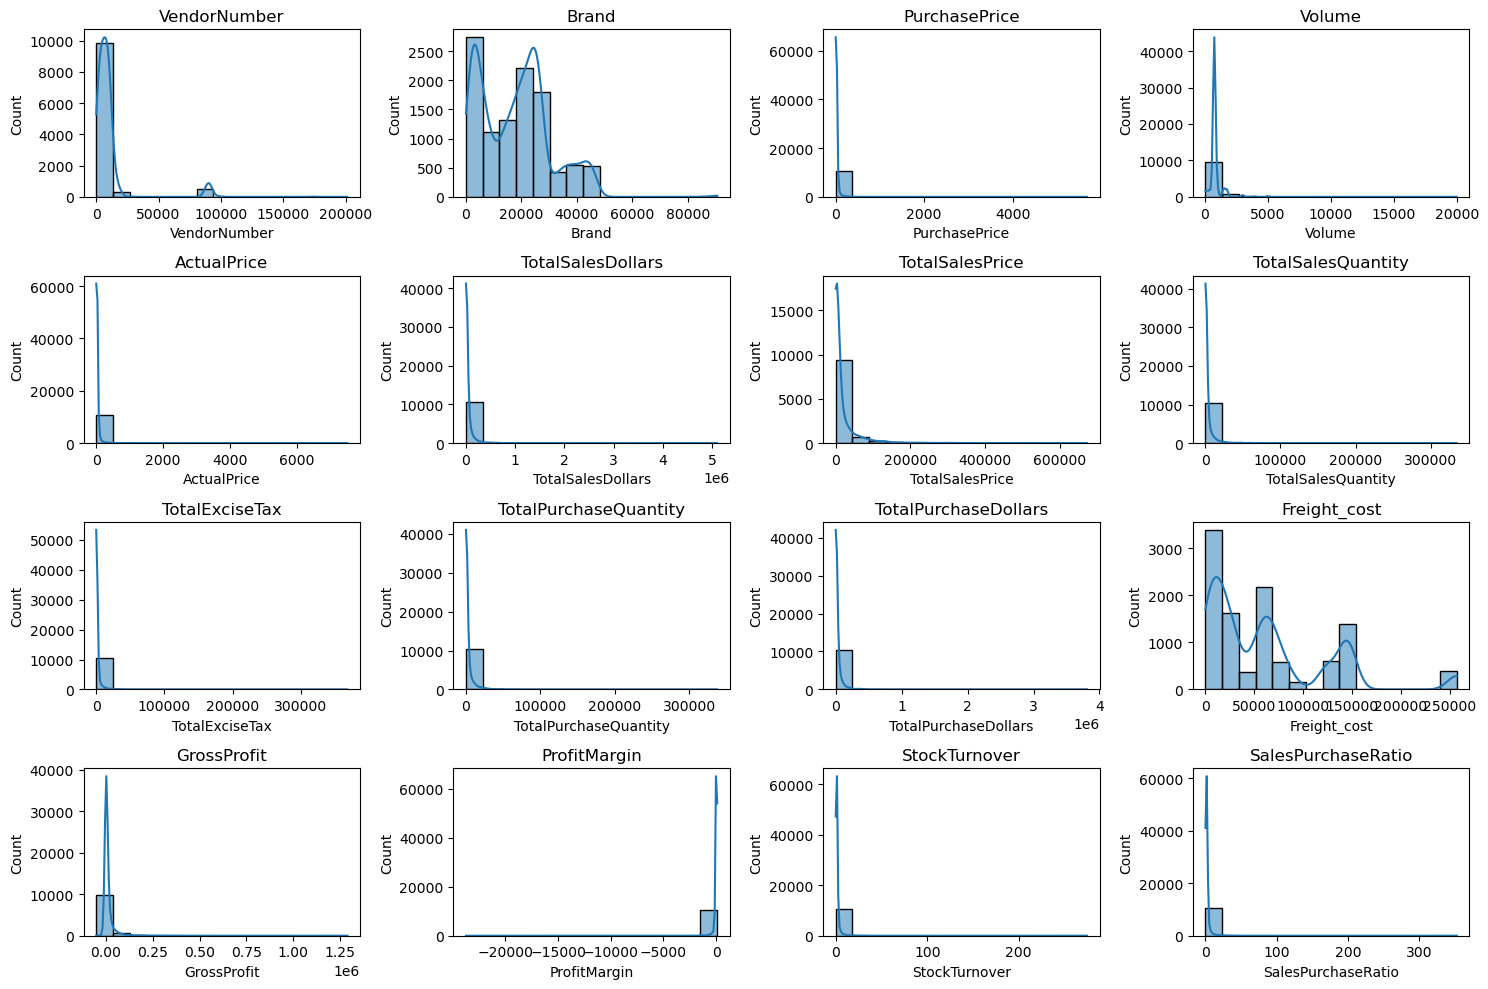

In [5]:
numerical_cols=data.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(data[col],kde=True,bins=15)
    plt.title(col)
plt.tight_layout()
plt.show()

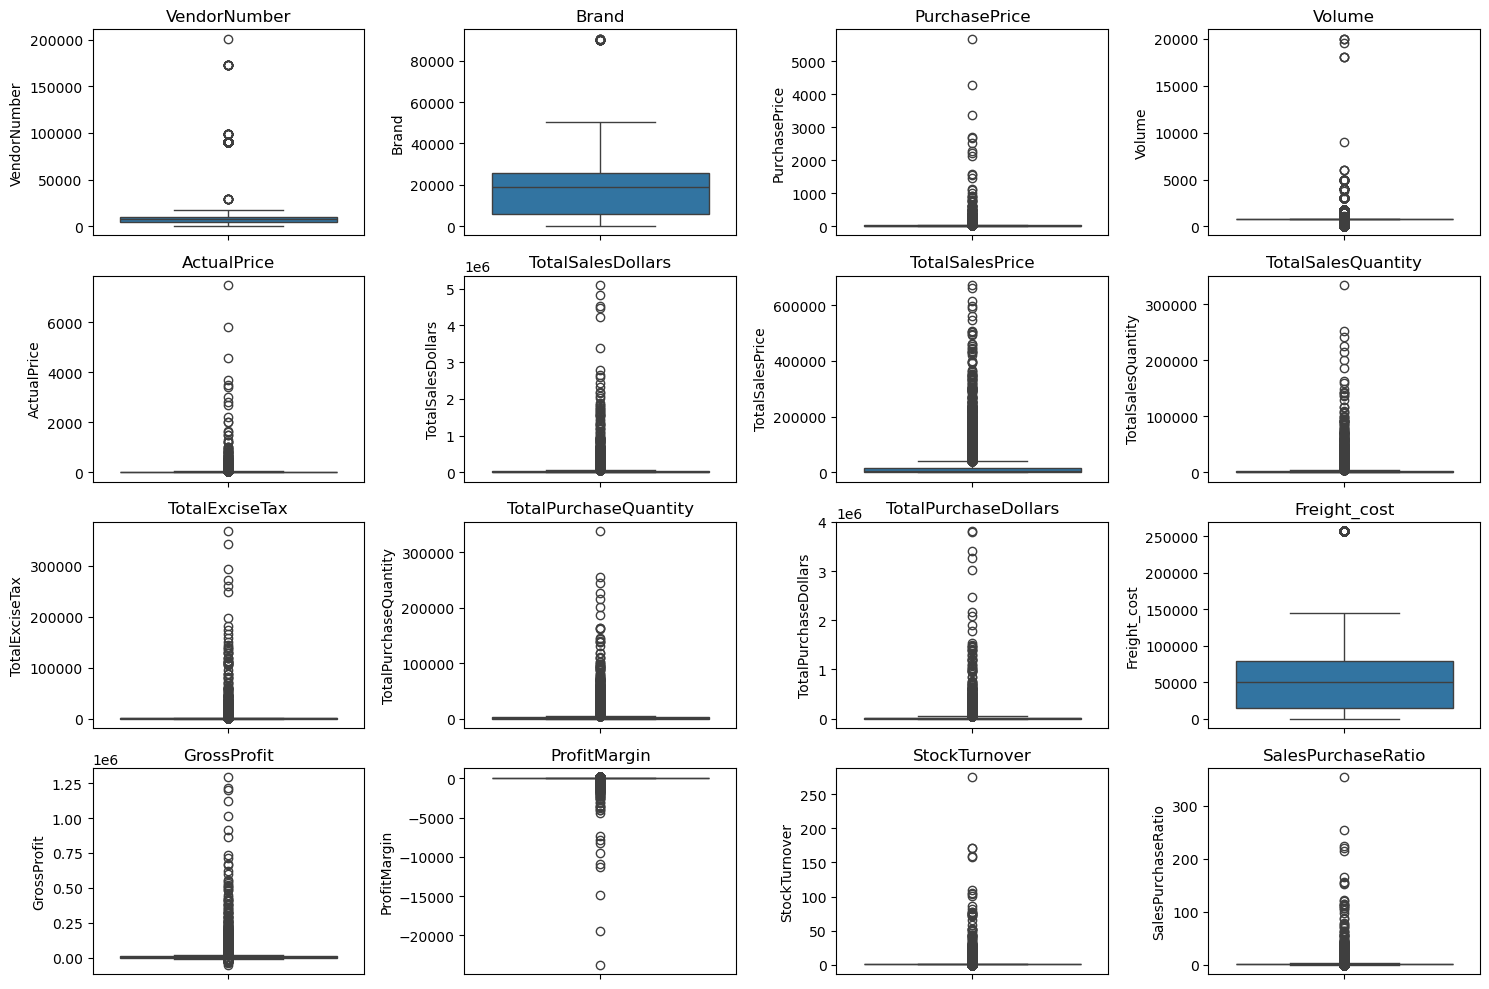

In [6]:
plt.figure(figsize=(15,10))
for i,cols in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(data[cols])
    plt.title(cols)
plt.tight_layout()
plt.show()

In [7]:
dataset = data[(data['GrossProfit'] > 0) &(data['ProfitMargin'] > 0) &(data['TotalSalesQuantity'] > 0)]

In [8]:
dataset.shape

(8564, 18)

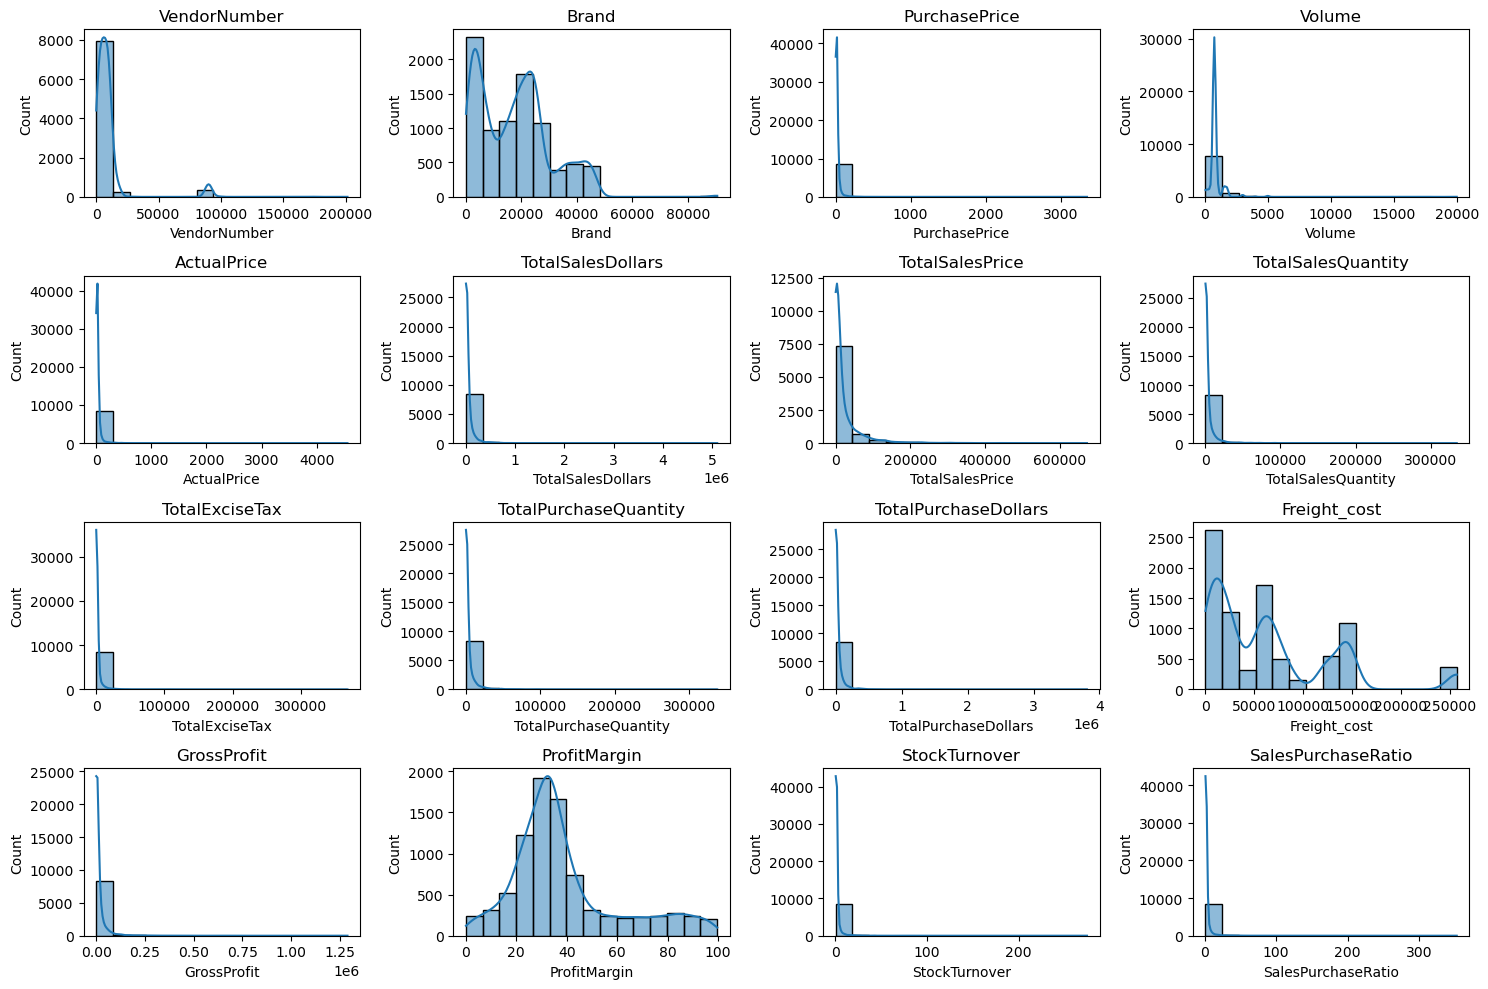

In [9]:
numerical=dataset.select_dtypes(include=np.number).columns
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical):
    plt.subplot(4,4,i+1)
    sns.histplot(dataset[col],kde=True,bins=15)
    plt.title(col)
plt.tight_layout()

In [10]:
dataset["VendorName"].value_counts().index[:5]

Index(['MARTIGNETTI COMPANIES', 'M S WALKER INC', 'ULTRA BEVERAGE COMPANY LLP',
       'PERFECTA WINES', 'E & J GALLO WINERY'],
      dtype='object', name='VendorName')

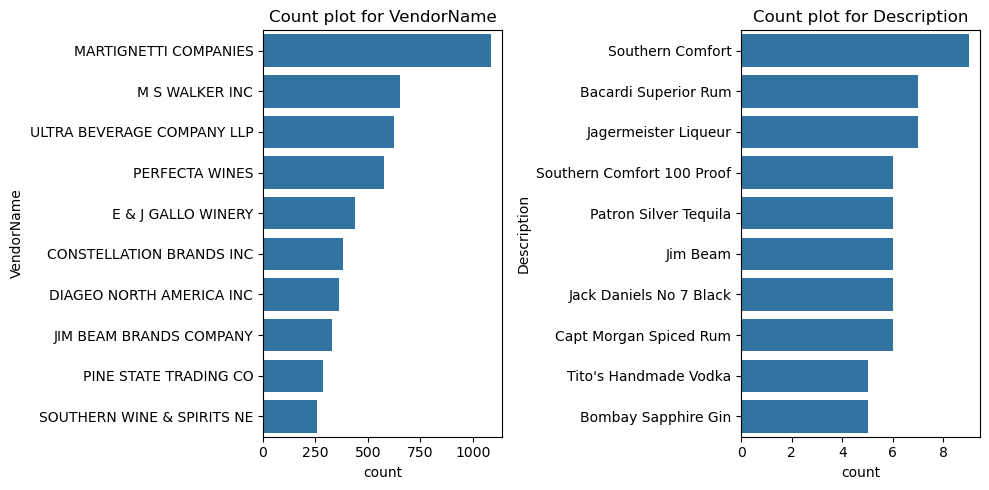

In [29]:
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(10,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(dataset[col],order=dataset[col].value_counts().index[:10])
    plt.title(f"Count plot for {col}")
plt.tight_layout()

Text(0.5, 1.0, 'Correlation')

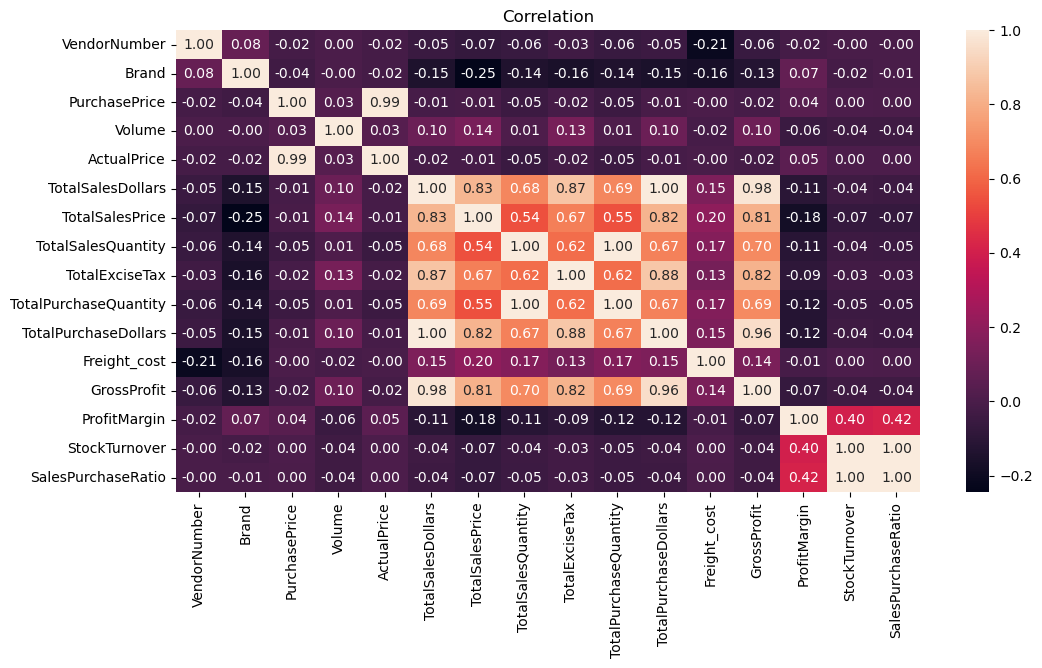

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(numeric_only=True),annot=True,fmt=".2f")
plt.title("Correlation")

## Data Analysis
##### Q. Identify the Brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margins?

In [10]:
brand_performance=dataset.groupby("Description").agg({
    "TotalSalesDollars":"sum",
    "ProfitMargin":"mean"}).reset_index()

In [11]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [12]:
low_threshold=brand_performance["TotalSalesDollars"].quantile(.15)
high_threshold=brand_performance["ProfitMargin"].quantile(.85)

In [13]:
low_threshold

560.299

In [14]:
high_threshold

64.97017552750113

In [15]:
target_brands= brand_performance[(
    brand_performance["TotalSalesDollars"]<=low_threshold) &
    (brand_performance["ProfitMargin"]>=high_threshold)]
display(target_brands.sort_values("TotalSalesDollars"))

,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


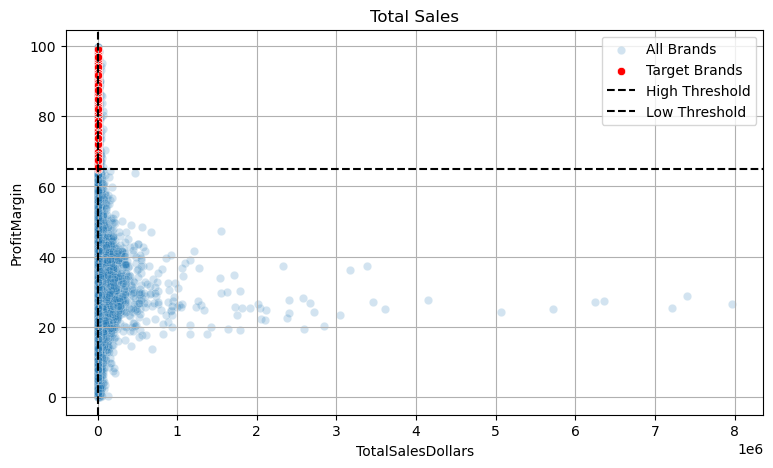

In [16]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=brand_performance,x="TotalSalesDollars",y="ProfitMargin",label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x="TotalSalesDollars",y="ProfitMargin",label="Target Brands",color="red")
plt.axhline(high_threshold,linestyle="--",color="black",label="High Threshold")
plt.axvline(low_threshold,linestyle="--",color="black",label="Low Threshold")
plt.title("Total Sales")
plt.legend()
plt.grid()

In [17]:
brand_performance=brand_performance[brand_performance["TotalSalesDollars"]<10000]

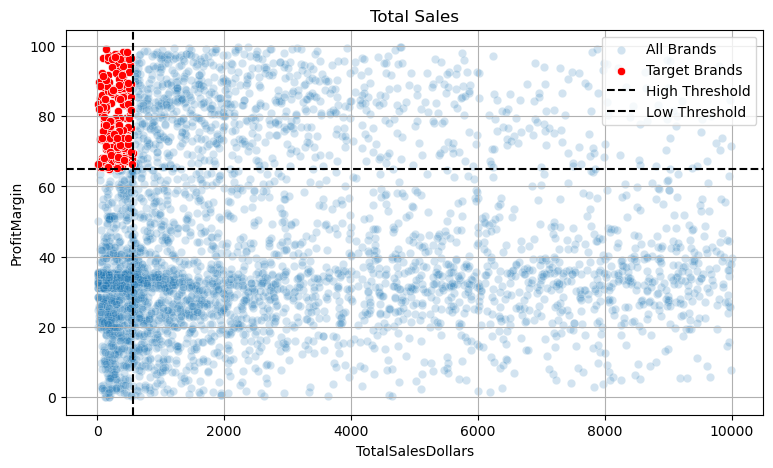

In [38]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=brand_performance,x="TotalSalesDollars",y="ProfitMargin",label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x="TotalSalesDollars",y="ProfitMargin",label="Target Brands",color="red")
plt.axhline(high_threshold,linestyle="--",color="black",label="High Threshold")
plt.axvline(low_threshold,linestyle="--",color="black",label="Low Threshold")
plt.title("Total Sales")
plt.legend()
plt.grid()

#### Q. Which Vendors and Brands demonstrate the highest sales performance?

In [18]:
top_vendors=dataset.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [19]:
top_brands=dataset.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [20]:
def formatDollars(value):
    if value>=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value>=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [21]:
top_brands.apply(lambda x: formatDollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

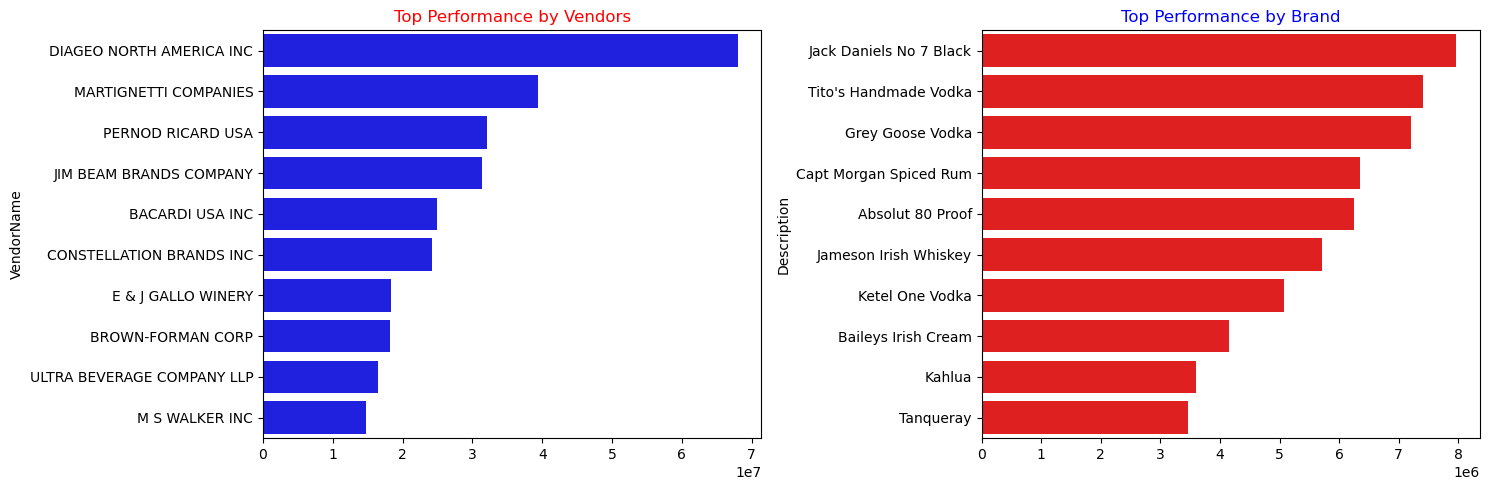

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(y=top_vendors.index,x=top_vendors.values,color="blue")
plt.title("Top Performance by Vendors",c="r")
plt.subplot(1,2,2)
sns.barplot(y=top_brands.index,x=top_brands.values,color="r")
plt.title("Top Performance by Brand",c="b")
plt.tight_layout()

#### Q. Which Vendors contribute the most to TotalPurchaseDollars?

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
vendor_performance=dataset.groupby("VendorName").agg({
    "TotalPurchaseDollars":"sum",
    "GrossProfit":"sum",
    "TotalSalesDollars":"sum"  
}).reset_index()


In [24]:
vendor_performance["PurchaseContribution"]=vendor_performance["TotalPurchaseDollars"]/vendor_performance["TotalPurchaseDollars"].sum()

In [25]:
vendor_performance.sort_values("PurchaseContribution",ascending=False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,1.630035e-01
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.297724e-02
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.760554e-02
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.644441e-02
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.671930e-02
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,4.185614e-07
107,UNCORKED,118.74,58.20,176.94,3.863493e-07
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,2.511238e-07
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,1.777845e-07


In [26]:
vendor_performance=round(vendor_performance.sort_values("PurchaseContribution",ascending=False),2)

In [27]:
top_vendors=vendor_performance.head(10)
top_vendors["TotalPurchaseDollars"]=top_vendors["TotalPurchaseDollars"].apply(formatDollars)
top_vendors["GrossProfit"]=top_vendors["GrossProfit"].apply(formatDollars)
top_vendors["TotalSalesDollars"]=top_vendors["TotalSalesDollars"].apply(formatDollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03


In [28]:
top_vendors["CumulativeContribution"]=top_vendors["PurchaseContribution"].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution,CumulativeContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16,0.16
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,0.08,0.24
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08,0.32
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08,0.40
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06,0.46
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05,0.51
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04,0.55
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04,0.59
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04,0.63
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03,0.66


#### Q. How much of total procurement is dependent on the top Vendors?

In [54]:
print(f"The Total Contribution of top 10 Vendors is {round(top_vendors["PurchaseContribution"].sum(),2)*100}%")

The Total Contribution of top 10 Vendors is 66.0%


#### Q. Does Purchasing in bulk reduce in unit price and what is the optimal purchase volumn for cost savings?

In [29]:
dataset["UnitPurchasePrice"]=dataset["TotalPurchaseDollars"]/dataset["TotalPurchaseQuantity"]

In [31]:
dataset["Ordersize"]=pd.qcut(dataset["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])

In [32]:
dataset.groupby("Ordersize")[["UnitPurchasePrice"]].mean()

,UnitPurchasePrice
Ordersize,
Small,39.068186
Medium,15.486414
Large,10.777625


<Axes: xlabel='Ordersize', ylabel='UnitPurchasePrice'>

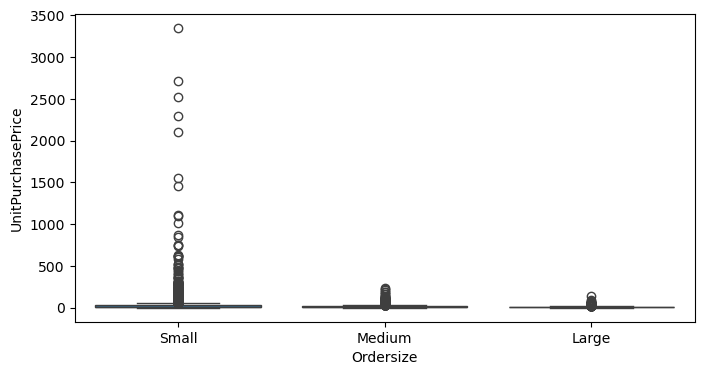

In [39]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dataset,x="Ordersize",y="UnitPurchasePrice")


- **Yes Purchasing in bulk reduce in unit price**

#### Q. Which vendors have low inventory turnover,indicating excess stock ? 

In [12]:
dataset[dataset["StockTurnover"]<1].groupby("VendorName")[["StockTurnover"]].mean().sort_values("StockTurnover",ascending=True).head(10).reset_index()

,VendorName,StockTurnover
0,ALISA CARR BEVERAGES,0.615385
1,HIGHLAND WINE MERCHANTS LLC,0.708333
2,PARK STREET IMPORTS LLC,0.751306
3,Circa Wines,0.755676
4,Dunn Wine Brokers,0.766022
5,CENTEUR IMPORTS LLC,0.773953
6,SMOKY QUARTZ DISTILLERY LLC,0.783835
7,TAMWORTH DISTILLING,0.797078
8,THE IMPORTED GRAPE LLC,0.807569
9,WALPOLE MTN VIEW WINERY,0.820548
